# Tarea 1: ENPOVE
### *Módulo de empleo*

In [1]:
import pandas as pd
import os

csv_path = os.path.join("data", "ENPOVE2022_V_600 Empleo.csv")
m_empleo= pd.read_csv(csv_path,encoding = "latin-1", low_memory=False)
m_empleo.columns= m_empleo.columns.str.lower()
m_empleo

,ï»¿ccdd,departamento,ccpp,provincia,ccdi,distrito,ciudad,conglomerado,nselv,vivienda,...,gedad1,gedad2,p625_d,p625_p,m622_1,m622_2,ingtot,ingtot_monetario,ingtot_no_monetario,factorfinal
0,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,2,2,1,1,1600,300,1900,1600,300,13.175820
1,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,0,0,,,,,,,,13.175820
2,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,3,3,1,1,,,1200,1200,0,13.175820
3,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1207001,9345,6,...,2,2,1,1,800,300,1100,800,300,26.351641
4,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1207001,9345,6,...,0,0,,,,,,,,26.351641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11616,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,393,12,...,2,2,1,1,,,1300,1300,0,18.422158
11617,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,393,12,...,1,1,1,1,,,1299,1299,0,18.422158
11618,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,396,13,...,3,3,1,1,,,312,312,0,12.281439
11619,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,396,13,...,3,4,,,,,,,,12.281439


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate

### *Módulo de Características de residentes del hogar*

In [3]:
csv_path = os.path.join("data", "ENPOVE2022_V_200_Residentes.csv")
m_residentes= pd.read_csv(csv_path,encoding = "latin-1", low_memory=False)
m_residentes.columns= m_residentes.columns.str.lower()
m_residentes

,ï»¿ccdd,departamento,ccpp,provincia,ccdi,distrito,ciudad,conglomerado,nselv,vivienda,...,p211_n,p211_1,p200_aportante,p211_n_parentesco,p211_n_sexo,p211_n_aãos,p211_n_meses,p211_n_ecivil,p211_n_migrante,factorfinal
0,15,LIMA,1,LIMA,19,LURIN,Lima,29806,68378,12,...,2,4.Otro,,2,2,29,,1,1,133.030686
1,15,LIMA,1,LIMA,19,LURIN,Lima,29778,68073,9,...,1,4.Otro,,1,2,35,,1,1,133.030686
2,7,LIMA,1,CALLAO,1,CALLAO,Lima,1814802,16137,9,...,1,4.Otro,,1,2,35,,6,1,133.030686
3,14,LAMBAYEQUE,1,CHICLAYO,6,LA VICTORIA,Chiclayo,3976,4564,9,...,1,4.Otro,,1,2,17,,6,1,18.043333
4,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,12284,10250,9,...,5,4.Otro,,11,2,17,,1,1,26.351641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,4,AREQUIPA,1,AREQUIPA,7,JACOBO HUNTER,Arequipa,43374,14722,29,...,,,,,,,,,,66.313829
12483,4,AREQUIPA,1,AREQUIPA,7,JACOBO HUNTER,Arequipa,43377,14725,32,...,,,,,,,,,,132.627658
12484,4,AREQUIPA,1,AREQUIPA,7,JACOBO HUNTER,Arequipa,43377,14725,32,...,,,,,,,,,,132.627658
12485,4,AREQUIPA,1,AREQUIPA,7,JACOBO HUNTER,Arequipa,43410,14694,7,...,,,,,,,,,,132.627658


### Debemos hacer un merge
Esto para poder obtener el dato de jefe del hogar y poder compararlos con sus respuestas en el módulo de empleo...

In [4]:
columnas_comunes = ['ï»¿ccdd', 'ccpp', 'ccdi', 'conglomerado', 'nselv', 'vivienda', 'thogar', 'nhogar', 'p200_n']

In [5]:
print("Contenido de las columnas comunes en m_residentes:")
print(m_residentes[columnas_comunes].head())

print("\nContenido de las columnas comunes en m_empleo:")
print(m_empleo[columnas_comunes].head())

Contenido de las columnas comunes en m_residentes:
   ï»¿ccdd  ccpp  ccdi  conglomerado  nselv  vivienda  thogar  nhogar  p200_n
0       15     1    19         29806  68378        12       1       1       5
1       15     1    19         29778  68073         9       1       1       6
2        7     1     1       1814802  16137         9       1       1       5
3       14     1     6          3976   4564         9       1       1       1
4        2    18     1         12284  10250         9       1       1       5

Contenido de las columnas comunes en m_empleo:
   ï»¿ccdd  ccpp  ccdi  conglomerado  nselv  vivienda  thogar  nhogar  p200_n
0        2    18     1       1206802   9340         3       1       1       1
1        2    18     1       1206802   9340         3       1       1       4
2        2    18     1       1206802   9340         3       1       1       5
3        2    18     1       1207001   9345         6       1       1       1
4        2    18     1       1207001   9345

#### **Creamos un código único**
Esto para poder identificar a cada persona encuestada en ambas bases de datos y poder hacer un merge en base a ese valor

In [6]:
m_residentes['codigo_unico'] = m_residentes[columnas_comunes].astype(str).agg('-'.join, axis=1)
m_empleo['codigo_unico'] = m_empleo[columnas_comunes].astype(str).agg('-'.join, axis=1)

In [7]:
for columna in columnas_comunes:
    m_residentes[columna] = m_residentes[columna].astype(str).str.strip()  
    m_empleo[columna] = m_empleo[columna].astype(str).str.strip()  

In [8]:
coincidencias = m_residentes['codigo_unico'].isin(m_empleo['codigo_unico'])
coincidencias

0        True
1        True
2        True
3        True
4        True
         ... 
12482    True
12483    True
12484    True
12485    True
12486    True
Name: codigo_unico, Length: 12487, dtype: bool

In [9]:
venezolanitos = pd.merge(m_residentes, m_empleo, on='codigo_unico', how='inner', suffixes=('_residente', '_empleo'))

Verificamos las columnas que se duplican y nos quedamos con las que aparecen en 'm_empleo'...

In [10]:
columnas_residente = set(venezolanitos.filter(regex='_residente').columns)
columnas_empleo = set(venezolanitos.filter(regex='_empleo').columns)

In [11]:
for col_residente in columnas_residente:
    # Identificar el nombre base de la columna
    col_base = col_residente.replace('_residente', '')
    col_empleo = col_base + '_empleo'
    
    if col_empleo in columnas_empleo:
        # Priorizar la columna de m_empleo
        venezolanitos[col_base] = venezolanitos[col_empleo]
        # Eliminar las columnas duplicadas
        venezolanitos.drop([col_residente, col_empleo], axis=1, inplace=True)

### **Selección de variables**
- p203: ¿Cuál es la relación de parentesco con el/la jefa del hogar? **[Categórica]**
- p204: Sexo **[Categórica]**
- p205_a: Edad en años **[Numérica]**
- p208: ¿Migró de Venezuela? **[Categórica]** - esta variable es más que todo para asegurar que todos hayan dicho que 'sí'
- p613: Usted, ¿ha firmado algún contrato laboral o brindó algún comprobante de pago por sus servicios? **[Categórica]**
- p616a: Normalmente, ¿Cuántas horas trabaja a la semana en todas sus ocupaciones? **[Numérica]**
- p622_1: ¿Cuánto fue su ingreso total sin descuento en el mes anterior? **[Numérica]**
- p636: En Venezuela, ¿tenía usted trabajo antes de iniciar su viaje? **[Categórica]**

In [12]:
variables =['p203','p204', 'p205_a', 'p208', 'p613', 'p622_1', 'p636', 'estrato', 'p616a']
filtraditos = venezolanitos[variables].copy()
filtraditos

,p203,p204,p205_a,p208,p613,p622_1,p636,estrato,p616a
0,8.Otro pariente,2.Mujer,16,1.SÃ­,,,2,4,
1,4.Yerno/nuera,2.Mujer,17,1.SÃ­,,,2,4,
2,4.Yerno/nuera,2.Mujer,17,1.SÃ­,,,2,3,
3,1.Jefe/a del hogar,2.Mujer,17,1.SÃ­,2,30,2,4,
4,11.Otro no pariente,2.Mujer,17,1.SÃ­,,,2,4,
...,...,...,...,...,...,...,...,...,...
11616,2.Esposo/a o compaÃ±ero/a,2.Mujer,31,1.SÃ­,2,830,2,3,
11617,1.Jefe/a del hogar,1.Hombre,30,1.SÃ­,1,800,1,4,
11618,2.Esposo/a o compaÃ±ero/a,2.Mujer,25,1.SÃ­,1,300,2,4,
11619,1.Jefe/a del hogar,1.Hombre,48,1.SÃ­,2,270,1,2,


In [13]:
import warnings
warnings.filterwarnings('ignore')
filtraditos = filtraditos.applymap(lambda x: ''.join(filter(str.isdigit, str(x))))
filtraditos

,p203,p204,p205_a,p208,p613,p622_1,p636,estrato,p616a
0,8,2,16,1,,,2,4,
1,4,2,17,1,,,2,4,
2,4,2,17,1,,,2,3,
3,1,2,17,1,2,30,2,4,
4,11,2,17,1,,,2,4,
...,...,...,...,...,...,...,...,...,...
11616,2,2,31,1,2,830,2,3,
11617,1,1,30,1,1,800,1,4,
11618,2,2,25,1,1,300,2,4,
11619,1,1,48,1,2,270,1,2,


In [14]:
filtraditos['p203'] = pd.to_numeric(filtraditos['p203'], errors='coerce')
filtraditos['p204'] = pd.to_numeric(filtraditos['p204'], errors='coerce')
filtraditos['p205_a'] = pd.to_numeric(filtraditos['p205_a'], errors='coerce')
filtraditos['p208'] = pd.to_numeric(filtraditos['p208'], errors='coerce')
filtraditos['p613'] = pd.to_numeric(filtraditos['p613'], errors='coerce')
filtraditos['p636'] = pd.to_numeric(filtraditos['p636'], errors='coerce')
filtraditos['estrato'] = pd.to_numeric(filtraditos['estrato'], errors='coerce')

**Damos las etiquetas a las variables...**

In [15]:
filtraditos['p203'] = filtraditos['p203'].apply(lambda x: 'jefe' if x == 1 else 'no_jefe')

filtraditos['p204'] = filtraditos['p204'].apply(lambda x: 'hombre' if x == 1 else 'mujer')

filtraditos['grupo_etario'] = pd.cut(filtraditos['p205_a'], 
                                     bins=[0, 17, 34, 64, float('inf')], 
                                     labels=['menor', 'joven', 'adulto', 'adulto mayor'])

filtraditos['p208'] = filtraditos['p208'].apply(lambda x: 'si' if x == 1 else 'no')

filtraditos['p613'] = filtraditos['p613'].apply(lambda x: 'si' if x == 1 else 'no')

filtraditos['p636'] = filtraditos['p636'].apply(lambda x: 'si' if x == 1 else 'no')

filtraditos['estrato'] = filtraditos['estrato'].apply(lambda x: 'bajo' if x == 1 
                                                     else 'medio_bajo' if x == 2 
                                                     else 'medio' if x == 3 
                                                     else 'medio_alto' if x == 4 
                                                     else 'alto' if x == 5 
                                                     else 'no_especifica')

filtraditos

,p203,p204,p205_a,p208,p613,p622_1,p636,estrato,p616a,grupo_etario
0,no_jefe,mujer,16.0,si,no,,no,medio_alto,,menor
1,no_jefe,mujer,17.0,si,no,,no,medio_alto,,menor
2,no_jefe,mujer,17.0,si,no,,no,medio,,menor
3,jefe,mujer,17.0,si,no,30,no,medio_alto,,menor
4,no_jefe,mujer,17.0,si,no,,no,medio_alto,,menor
...,...,...,...,...,...,...,...,...,...,...
11616,no_jefe,mujer,31.0,si,no,830,no,medio,,joven
11617,jefe,hombre,30.0,si,si,800,si,medio_alto,,joven
11618,no_jefe,mujer,25.0,si,si,300,no,medio_alto,,joven
11619,jefe,hombre,48.0,si,no,270,si,medio_bajo,,adulto


In [16]:
filtraditos.rename(columns={
    'p203': 'jefe_hogar',
    'p204': 'sexo',
    'p205_a': 'edad',
    'p208': 'migracion_venezuela',
    'p613': 'firma_contrato',
    'p636': 'trabajo_venezuela',
    'p622_1': 'ingreso_mensual',
    'p616a' : 'horas_trabaja_sem'
}, inplace=True)
filtraditos

,jefe_hogar,sexo,edad,migracion_venezuela,firma_contrato,ingreso_mensual,trabajo_venezuela,estrato,horas_trabaja_sem,grupo_etario
0,no_jefe,mujer,16.0,si,no,,no,medio_alto,,menor
1,no_jefe,mujer,17.0,si,no,,no,medio_alto,,menor
2,no_jefe,mujer,17.0,si,no,,no,medio,,menor
3,jefe,mujer,17.0,si,no,30,no,medio_alto,,menor
4,no_jefe,mujer,17.0,si,no,,no,medio_alto,,menor
...,...,...,...,...,...,...,...,...,...,...
11616,no_jefe,mujer,31.0,si,no,830,no,medio,,joven
11617,jefe,hombre,30.0,si,si,800,si,medio_alto,,joven
11618,no_jefe,mujer,25.0,si,si,300,no,medio_alto,,joven
11619,jefe,hombre,48.0,si,no,270,si,medio_bajo,,adulto


In [17]:
filtraditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11621 entries, 0 to 11620
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   jefe_hogar           11621 non-null  object  
 1   sexo                 11621 non-null  object  
 2   edad                 11395 non-null  float64 
 3   migracion_venezuela  11621 non-null  object  
 4   firma_contrato       11621 non-null  object  
 5   ingreso_mensual      11621 non-null  object  
 6   trabajo_venezuela    11621 non-null  object  
 7   estrato              11621 non-null  object  
 8   horas_trabaja_sem    11621 non-null  object  
 9   grupo_etario         11395 non-null  category
dtypes: category(1), float64(1), object(8)
memory usage: 828.8+ KB


## Ingreso Mensual

In [18]:
filtraditos['ingreso_mensual'] = pd.to_numeric(filtraditos['ingreso_mensual'], errors='coerce')

In [19]:
print("Media:", round(filtraditos['ingreso_mensual'].mean(),2))
print("Mediana:", round(filtraditos['ingreso_mensual'].median(),2))
print("Desviación estándar:", round(filtraditos['ingreso_mensual'].std(),2))
print("Varianza:", round(filtraditos['ingreso_mensual'].var(),2))
print("Moda:", filtraditos['ingreso_mensual'].mode()[0])
print("Valor mínimo:", filtraditos['ingreso_mensual'].min())
print("Valor máximo:", filtraditos['ingreso_mensual'].max())

Media: 511.03
Mediana: 330.0
Desviación estándar: 620.28
Varianza: 384749.81
Moda: 300.0
Valor mínimo: 0.0
Valor máximo: 9500.0


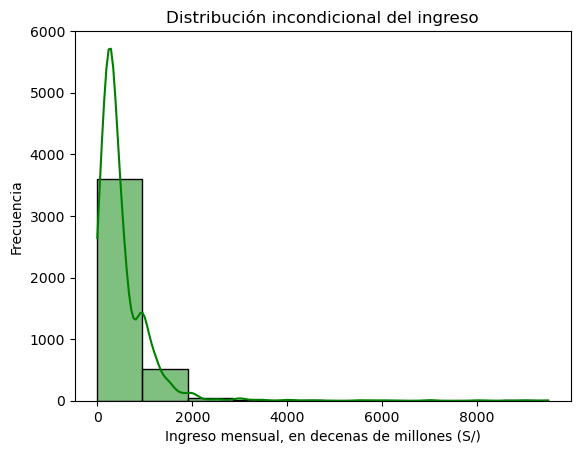

In [20]:
sns.histplot(filtraditos['ingreso_mensual'], kde=True, color="green", bins=10)

plt.title("Distribución incondicional del ingreso")
plt.xlabel("Ingreso mensual, en decenas de millones (S/)")
plt.ylabel("Frecuencia")
plt.show()

In [21]:
filtraditos['log_ingreso_mensual'] = filtraditos['ingreso_mensual'].apply(lambda x: np.log(x) if x > 0 else np.nan)
filtraditos

,jefe_hogar,sexo,edad,migracion_venezuela,firma_contrato,ingreso_mensual,trabajo_venezuela,estrato,horas_trabaja_sem,grupo_etario,log_ingreso_mensual
0,no_jefe,mujer,16.0,si,no,NaN,no,medio_alto,,menor,NaN
1,no_jefe,mujer,17.0,si,no,NaN,no,medio_alto,,menor,NaN
2,no_jefe,mujer,17.0,si,no,NaN,no,medio,,menor,NaN
3,jefe,mujer,17.0,si,no,30.0,no,medio_alto,,menor,3.401197
4,no_jefe,mujer,17.0,si,no,NaN,no,medio_alto,,menor,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11616,no_jefe,mujer,31.0,si,no,830.0,no,medio,,joven,6.721426
11617,jefe,hombre,30.0,si,si,800.0,si,medio_alto,,joven,6.684612
11618,no_jefe,mujer,25.0,si,si,300.0,no,medio_alto,,joven,5.703782
11619,jefe,hombre,48.0,si,no,270.0,si,medio_bajo,,adulto,5.598422


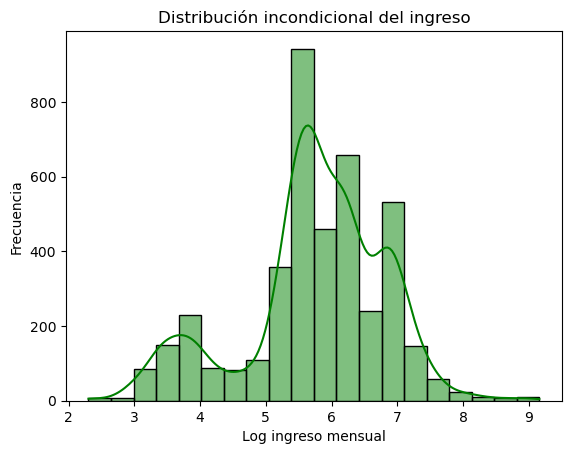

In [22]:
sns.histplot(filtraditos['log_ingreso_mensual'], kde=True, color="green", bins=20)
plt.title("Distribución incondicional del ingreso")
plt.xlabel("Log ingreso mensual")
plt.ylabel("Frecuencia")
plt.show()

## Cantidad de horas trabajadas a la semana

In [23]:
filtraditos['horas_trabaja_sem'] = pd.to_numeric(filtraditos['horas_trabaja_sem'], errors='coerce')

In [24]:
print("Media:", round(filtraditos['horas_trabaja_sem'].mean(),2))
print("Mediana:", round(filtraditos['horas_trabaja_sem'].median(),2))
print("Desviación estándar:", round(filtraditos['horas_trabaja_sem'].std(),2))
print("Varianza:", round(filtraditos['horas_trabaja_sem'].var(),2))
print("Moda:", filtraditos['horas_trabaja_sem'].mode()[0])
print("Valor mínimo:", filtraditos['horas_trabaja_sem'].min())
print("Valor máximo:", filtraditos['horas_trabaja_sem'].max())

Media: 50.79
Mediana: 50.0
Desviación estándar: 20.56
Varianza: 422.9
Moda: 60.0
Valor mínimo: 2.0
Valor máximo: 110.0


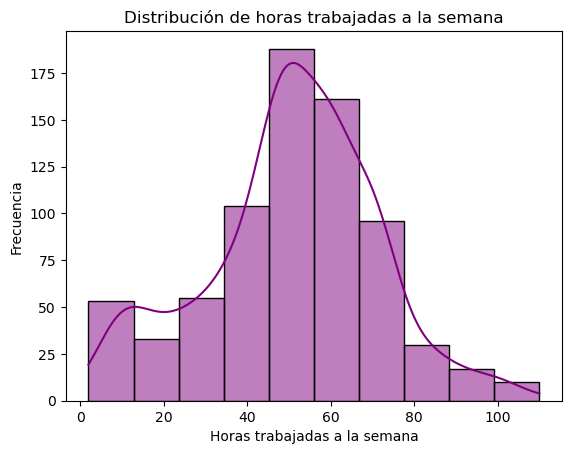

In [25]:
sns.histplot(filtraditos['horas_trabaja_sem'], kde=True, color="purple", bins=10)

plt.title("Distribución de horas trabajadas a la semana")
plt.xlabel("Horas trabajadas a la semana")
plt.ylabel("Frecuencia")
plt.show()

### *Distribución en base al sexo*

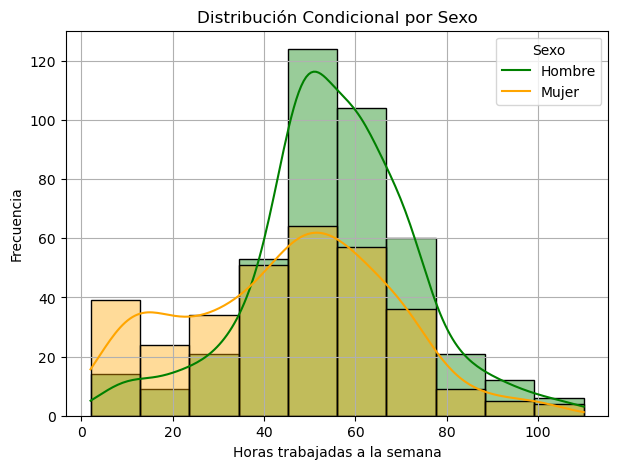

In [26]:
plt.figure(figsize=(7, 5))
sns.histplot(filtraditos, x='horas_trabaja_sem', hue='sexo', kde=True, bins=10, 
             palette={'hombre': "green", 'mujer': "orange"}, alpha=0.4)  

# Ajustes del gráfico
plt.title("Distribución Condicional por Sexo")
plt.xlabel("Horas trabajadas a la semana")
plt.ylabel("Frecuencia")
plt.legend(labels=["Hombre", "Mujer"], title="Sexo")
plt.grid(True)
plt.show()

In [27]:
est_hora_sexo = filtraditos.groupby('sexo')['horas_trabaja_sem'].agg(
    Media='mean',
    Mediana='median',
    Desv_Est='std',
    Varianza='var',
    Mínimo='min',
    Máximo='max',
    Moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index()

est_hora_sexo = est_hora_sexo.round(2)
print(tabulate(est_hora_sexo, headers='keys', tablefmt='grid'))

+----+--------+---------+-----------+------------+------------+----------+----------+--------+
|    | sexo   |   Media |   Mediana |   Desv_Est |   Varianza |   Mínimo |   Máximo |   Moda |
+====+========+=========+===========+============+============+==========+==========+========+
|  0 | hombre |   55.09 |        54 |      18.05 |     325.93 |        4 |      110 |     60 |
+----+--------+---------+-----------+------------+------------+----------+----------+--------+
|  1 | mujer  |   45.15 |        48 |      22.26 |     495.3  |        2 |      100 |     48 |
+----+--------+---------+-----------+------------+------------+----------+----------+--------+
